# Working with CSV's

Accept CSVs with different variations of data inside them.

Then get them set up to work with library.

In [1]:
# ONLY RUN ONCE, must restart notebook otherwise
import pandas as pd
import os
from pathlib import Path
current_dir = Path.cwd()
path = current_dir.parent
print(path)
#change directory to get src class data
os.chdir(path)
from src.data_object import *
from src.transforms import *

from src.calculable_object import *
from src.wellbore_trajectory import *

C:\Users\BpAmos\Documents\repos\directional-survey-converter


## Get Files

In [2]:
file_paths = get_files(path, folders='data')
file_paths.items

[WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/wellbore_survey.csv'),
 WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/wellbore_survey.json'),
 WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/wellbore_survey_many.csv'),
 WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/well_interpolate_data.csv')]

In [3]:
filePath = file_paths[0]
filePath

WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/wellbore_survey.csv')

In [4]:
df = pd.read_csv(filePath, sep=",")

In [6]:
def from_df(df, wellId_name: Optional[str] = None, md_name: Optional[str] = None,
            inc_name: Optional[str] = None, azim_name: Optional[str] = None,
            surface_latitude_name: Optional[str] = None,
            surface_longitude_name: Optional[str] = None):
    
        # if no column names are specified use 0:5 for dir survey obj
    wellId_name = if_none(wellId_name, df.columns[0])
    md_name = if_none(md_name, df.columns[1])
    inc_name = if_none(inc_name, df.columns[2])
    azim_name = if_none(azim_name, df.columns[3])
    surface_latitude_name = if_none(surface_latitude_name, df.columns[4])
    surface_longitude_name = if_none(surface_longitude_name, df.columns[5])
    
    dataclass_obj = dict(wellId=df[wellId_name][0],
                           md=np.array(df[md_name]),
                           inc=np.array(df[inc_name]),
                           azim=np.array(df[azim_name]),
                           surface_latitude=df[surface_latitude_name][0],
                           surface_longitude=df[surface_longitude_name][0])
    return dataclass_obj

## Iterate through multiple wells

In [7]:
grouped = df.groupby('wellId')

d={}
dlist=[]
for name, group in grouped:
    print(name)
    #print(group)
    group.reset_index(inplace=True, drop=True)
    #print(group)
    my_well_dict = from_df(group)
    #print(my_well_dict)
    well_obj = WellboreTrajectory(my_well_dict)
    well_obj.calculate_survey_points()
    well_obj.deviation_survey_obj
    #print(well_obj.deviation_survey_obj)
    
    dataclass_obj = {'wellId': well_obj.deviation_survey_obj.wellId,
                                  'md': well_obj.deviation_survey_obj.md,
                                  'inc': well_obj.deviation_survey_obj.inc,
                                  'azim': well_obj.deviation_survey_obj.azim,
                                  'tvd': well_obj.deviation_survey_obj.tvd,
                                  'e_w_deviation': well_obj.deviation_survey_obj.e_w_deviation,
                                  'n_s_deviation': well_obj.deviation_survey_obj.n_s_deviation,
                                  'dls': well_obj.deviation_survey_obj.dls,
                                  'surface_latitude': well_obj.deviation_survey_obj.surface_latitude,
                                  'surface_longitude': well_obj.deviation_survey_obj.surface_longitude,
                                  'longitude_points': well_obj.deviation_survey_obj.longitude_points,
                                  'latitude_points': well_obj.deviation_survey_obj.latitude_points,
                                  'zone_number': well_obj.deviation_survey_obj.zone_number,
                                  'zone_letter': well_obj.deviation_survey_obj.zone_letter,
                                  'x_points': well_obj.deviation_survey_obj.x_points,
                                  'y_points': well_obj.deviation_survey_obj.y_points,
                                  'surface_x': well_obj.deviation_survey_obj.surface_x,
                                  'surface_y': well_obj.deviation_survey_obj.surface_y,
                                  'isHorizontal': well_obj.deviation_survey_obj.isHorizontal
                                  }
    
    
    d=dataclass_obj
    print(d)
    dlist.append(d)
    
#dlist

well_C


TypeError: __init__() missing 1 required positional argument: 'file_type'

In [86]:
df_final = pd.DataFrame()
for i in dlist:
    df1 = pd.DataFrame(i)
    #print(df1)
    df_final = df_final.append(df1)
df_final

,wellId,md,inc,azim,tvd,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,longitude_points,latitude_points,zone_number,zone_letter,x_points,y_points,surface_x,surface_y,isHorizontal
0,well_A,0.0000,0.00,227.11,0.000000,0.000000e+00,0.000000e+00,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.932586,3.311662e+06,759587.932586,3.311662e+06,Vertical
1,well_A,36.7500,0.00,227.11,36.750000,-1.558201e-17,-1.447458e-17,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.932586,3.311662e+06,759587.932586,3.311662e+06,Vertical
2,well_A,813.5505,0.46,227.11,813.542155,-2.284634e+00,-2.122263e+00,0.059217,29.908294,47.688521,47.688516,29.908289,38,R,759587.236230,3.311661e+06,759587.932586,3.311662e+06,Vertical
3,well_A,840.0000,0.13,163.86,839.991268,-2.354083e+00,-2.223348e+00,1.249832,29.908294,47.688521,47.688516,29.908288,38,R,759587.215062,3.311661e+06,759587.932586,3.311662e+06,Vertical
4,well_A,945.0000,0.57,230.43,944.989049,-2.723571e+00,-2.670477e+00,0.418306,29.908294,47.688521,47.688515,29.908287,38,R,759587.102442,3.311661e+06,759587.932586,3.311662e+06,Vertical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,well_C,10613.0000,89.88,27.59,7660.358132,2.408116e+03,2.536985e+03,0.025961,29.908294,47.688521,47.696306,29.915110,38,R,760321.928281,3.312435e+06,759587.934440,3.311662e+06,Horizontal
106,well_C,10707.0000,90.00,26.69,7660.456505,2.450995e+03,2.620632e+03,0.120140,29.908294,47.688521,47.696448,29.915337,38,R,760334.997584,3.312461e+06,759587.934440,3.311662e+06,Horizontal
107,well_C,10802.0000,89.72,26.72,7660.688569,2.493687e+03,2.705499e+03,0.294745,29.908294,47.688521,47.696589,29.915568,38,R,760348.010275,3.312487e+06,759587.934440,3.311662e+06,Horizontal
108,well_C,10851.0000,90.06,27.04,7660.782610,2.515841e+03,2.749204e+03,0.692054,29.908294,47.688521,47.696662,29.915686,38,R,760354.762783,3.312500e+06,759587.934440,3.311662e+06,Horizontal


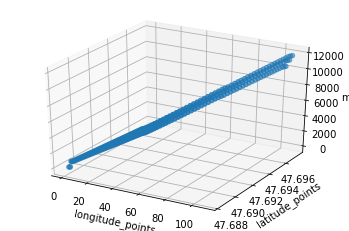

In [94]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df_final.index, df_final['longitude_points'], df_final['md'])

threedee.set_xlabel('longitude_points')
threedee.set_ylabel('latitude_points')
threedee.set_zlabel('md')
plt.show()

In [40]:
def from_df(df, wellId_name: Optional[str] = None, md_name: Optional[str] = None,
            inc_name: Optional[str] = None, azim_name: Optional[str] = None,
            surface_latitude_name: Optional[str] = None,
            surface_longitude_name: Optional[str] = None):
    
        # if no column names are specified use 0:5 for dir survey obj
    wellId_name = if_none(wellId_name, df.columns[0])
    md_name = if_none(md_name, df.columns[1])
    inc_name = if_none(inc_name, df.columns[2])
    azim_name = if_none(azim_name, df.columns[3])
    surface_latitude_name = if_none(surface_latitude_name, df.columns[4])
    surface_longitude_name = if_none(surface_longitude_name, df.columns[5])
    
    dataclass_obj = dict(wellId=df[wellId_name][0],
                           md=np.array(df[md_name]),
                           inc=np.array(df[inc_name]),
                           azim=np.array(df[azim_name]),
                           surface_latitude=df[surface_latitude_name][0],
                           surface_longitude=df[surface_longitude_name][0])
    return dataclass_obj

In [34]:
my_well_dict = from_df(group)
#my_well_dict

In [35]:
# use that path to greate a Deviation Survey Object
my_calc_obj = WellboreTrajectory(my_well_dict)
#my_calc_obj.deviation_survey_obj

In [33]:
my_calc_obj.calculate_survey_points()
my_calc_obj.deviation_survey_obj

DeviationSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,

In [ ]:
@classmethod
def from_df(cls,  df:DataFrame, wellId_name: Optional[str] = None, md_name: Optional[str] = None,
            inc_name: Optional[str] = None, azim_name: Optional[str] = None,
            surface_latitude_name: Optional[str] = None,
            surface_longitude_name: Optional[str] = None) -> 'DirectionalSurveyObj':

    # if no column names are specified use 0:5 for dir survey obj
    wellId_name = ifnone(wellId_name, df.columns[0])
    md_name = ifnone(md_name, df.columns[1])
    inc_name = ifnone(inc_name, df.columns[2])
    azim_name = ifnone(azim_name, df.columns[3])
    surface_latitude_name = ifnone(surface_latitude_name, df.columns[4])
    surface_longitude_name = ifnone(surface_longitude_name, df.columns[5])

    dataclass_obj = dict(wellId=df[wellId_name][0],
                               md=np.array(df[md_name]),
                               inc=np.array(df[inc_name]),
                               azim=np.array(df[azim_name]),
                               surface_latitude=df[surface_latitude_name][0],
                               surface_longitude=df[surface_longitude_name][0])
    return dataclass_obj

def from_csv(self, **kwargs):
    if self.extension == '.csv':
        print(self.path)
        # go through csv steps
        # Transform.from_csv: > return self.from_df
        # self.from_df > return self.from_json
        df = pd.read_csv(self.path, sep=',')
        return self.from_df(df, **kwargs)